In [59]:
"""
Author: Alexander Genser
Date: 2023-03-06
Module Name: data_usage.ipynb
Description: This notebook read the dataset and computes basic descriptives and showcases two features
                that can be useful for any type of model engineering. 
             Further analysis and data cleaning needs to be done as the task at hand requires. 
'''

In [103]:
# imports 
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = (15, 5)

In [104]:
# Set the URL of the zipped file
url = "https://www.research-collection.ethz.ch/bitstream/handle/20.500.11850/556642/Traffic_Signal_Control_Dataset.zip?sequence=1&isAllowed=y"

# Send a request to retrieve the file
response = requests.get(url)

# Read the content of the response into a BytesIO object
zip_content = io.BytesIO(response.content)

# Open the zip file using the zipfile module
with zipfile.ZipFile(zip_content, 'r') as zip_file:
    # Extract all the files in the zip archive
    zip_file.extractall()

In [79]:
# load first file from dataset and print head information about dataframe
dataset = pd.read_csv('intersection_data_set_feb_01_15.csv')
dataset.head()

,time,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,sg3,sg4,sg5,sg6,sg7,sg8,sg9,sg10,sg11,sg12
0,2019-02-01 00:07:09,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0
1,2019-02-01 00:07:10,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0
2,2019-02-01 00:07:11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0
3,2019-02-01 00:07:12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0
4,2019-02-01 00:07:13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Detection')

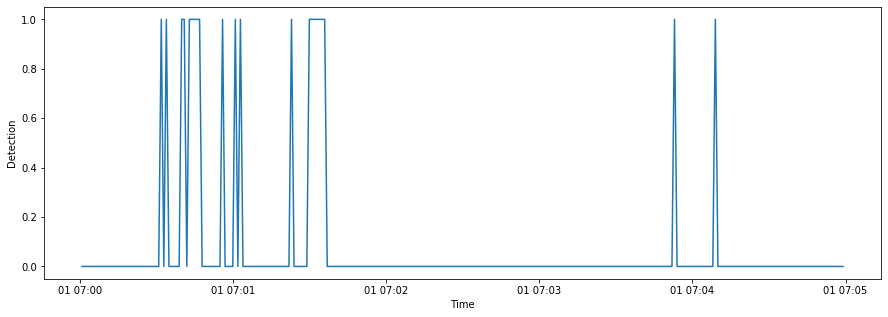

In [101]:
# take detector 5 at the intersection as example and retrieve a 5 minute sample to plot the detections
detector = 'd5'
time_from = dt.datetime(2019, 2, 1, 7, 0, 0)
time_to = dt.datetime(2019, 2, 1, 7, 5, 0)

# filtering data
detector_snippet = dataset[['time', detector]]
detector_snippet['time'] = pd.to_datetime(detector_snippet['time'])
detector_snippet = detector_snippet.loc[(detector_snippet.time < time_to)]
detector_snippet = detector_snippet.loc[(detector_snippet.time > time_from)]   
                               
#plot detections
plt.plot(detector_snippet['time'], detector_snippet[detector])
plt.xlabel('Time')
plt.ylabel('Detection')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Detection')

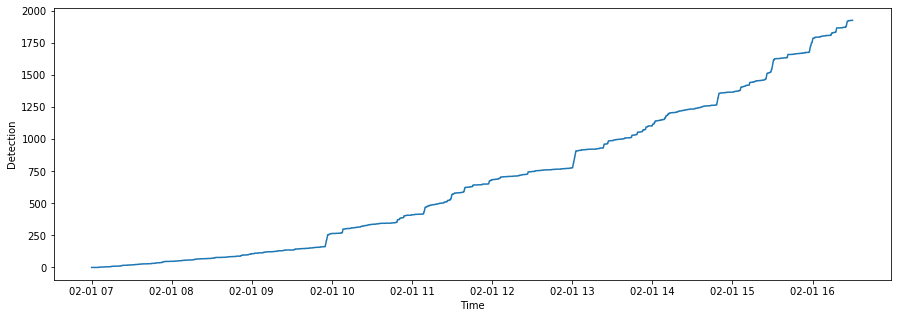

In [100]:
# take detector 4 at the intersection as example and retrieve a multiple hours of data
detector = 'd4'
time_from = dt.datetime(2019, 2, 1, 7, 0, 0)
time_to = dt.datetime(2019, 2, 1, 16, 30, 0)

# filtering data
detector_snippet = dataset[['time', detector]]
detector_snippet['time'] = pd.to_datetime(detector_snippet['time'])
detector_snippet = detector_snippet.loc[(detector_snippet.time < time_to)]
detector_snippet = detector_snippet.loc[(detector_snippet.time > time_from)]   
                               
# plot cumulative detections as they can show if a detector (a) has periods where it shows constant detections or (b) no detections
# further data cleaning might be done from here
plt.plot(detector_snippet['time'], detector_snippet[detector].cumsum())
plt.xlabel('Time')
plt.ylabel('Detection')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


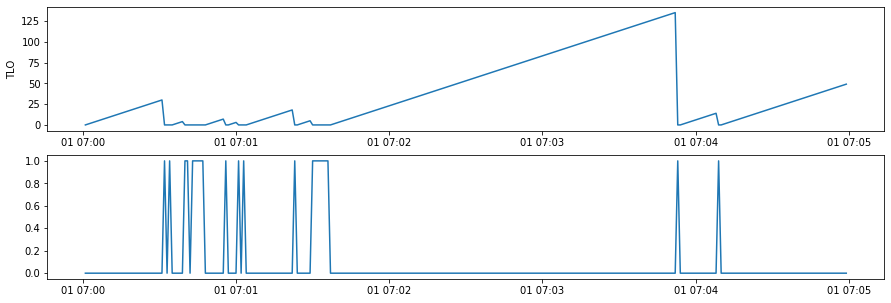

In [105]:
# sample feature computation of the Time last occupation (TLO) of detector x
 # if detector = 1 -> TLO = 0 
 # else count ++

# doing the work for all detectors in the 5 minute data snippet
filter_col = [col for col in detector_snippet if col.startswith('d')]
for det in detector_snippet.loc[:,filter_col].columns: 
    detector_snippet['TLO_' + str(det)] = np.where(detector_snippet[det]== 1, 
                                 0, detector_snippet.groupby((detector_snippet[det] != detector_snippet[det].shift(1)).cumsum()).cumcount())


# plot the feature for detector 5 from above
f, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(detector_snippet['time'], detector_snippet['TLO_' + detector])
ax1.set_ylabel('TLO')
ax2.plot(detector_snippet['time'], detector_snippet[detector])

In [108]:
# sample fature computation of the traffic flow during a red and green phase of a corresponding traffic light
# create the traffic flow since the last red; 
# if signal is red F == 0
# else if signal green
#  cumulate detections

#create map of devices (as we need to know which detector serves which signal for traffic flow)
mapping = {'sg':[col for col in dataset if col.startswith('sg')],
           'det':['NA', 'd4', 'd4', 'd5', 'd5', 'd6', 'NA', 'NA', 'NA', 'NA', 'd7', 'd2']}
infra_map = pd.DataFrame(mapping)
identifier_red = 0
identifier_green = 1

#flow features is only constructed with a detector serves that traffic light
for sg, det in infra_map.itertuples(index=False):
    if det != 'NA':
        dataset['Count_FR'] = np.cumsum((dataset[sg] != dataset[sg].shift(1)) & (dataset[sg] == identifier_red))
        dataset['FR_' + str(sg)] = np.where((dataset[sg] == identifier_red), 
                                                     dataset[det].groupby(dataset['Count_FR']).apply(lambda x:  ((x - x.shift(-1)) > 0).cumsum()), 0)
        dataset['Count_FG'] = np.cumsum((dataset[sg] != dataset[sg].shift(1)) & (dataset[sg] == identifier_green))
        dataset['FG_' + str(sg)] = np.where((dataset[sg] == identifier_green), 
                                                     dataset[det].groupby(dataset['Count_FG']).apply(lambda x:  ((x - x.shift(-1)) > 0).cumsum()), 0)

# eliminate counting columns (remove if these are needed)
dataset = dataset.drop(['Count_FR'],axis=1)
dataset = dataset.drop(['Count_FG'],axis=1)

In [111]:
data_snippet.columns

Index(['time', 'd5'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


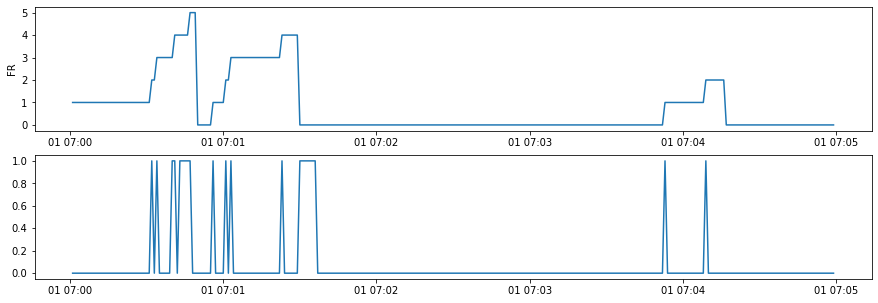

In [112]:
# plot the feature for detector 5 from above
time_from = dt.datetime(2019, 2, 1, 7, 0, 0)
time_to = dt.datetime(2019, 2, 1, 7, 5, 0)

# filtering data
dataset['time'] = pd.to_datetime(dataset['time'])
data_snippet = dataset.loc[(dataset.time > time_from)]
data_snippet = data_snippet.loc[(data_snippet.time < time_to)]   

f, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(data_snippet['time'], data_snippet['FR_sg5'])
ax1.set_ylabel('FR')
ax2.plot(data_snippet['time'], data_snippet[detector])